<a href="https://colab.research.google.com/github/draglar/house-prices/blob/main/IP_week7_Ian_Muigai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Specifying the question

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### Metrics of success

> The model will be a success if itaccurately predicts the prices of the houses.

### Understanding the content

Hass Consulting Company which is a real estate leader with over 25 years of experience. wants a study on the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

## Exploring the data

### Importing the dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
houses = pd.read_csv('https://raw.githubusercontent.com/draglar/house-prices/main/Independent%20Project%20Week%207%20-%20house_data.csv')

### Previewing The dataset

In [ ]:
houses.shape

(21610, 19)

In [ ]:
houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
houses.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


### Cleaning the dataset

#### Checking for null values

In [3]:
houses.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Cheking duplicated values

In [4]:
houses.duplicated().sum()

3

In [5]:
houses.drop_duplicates(inplace=True)

> I droped the 3 duplicate values

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

#### Altering columns

> Renaming the floors column to integer

In [7]:
houses.floors=houses.floors.astype('int')

> droping the id column

In [8]:
houses.drop('id',axis=1,inplace=True)

#### Checking for outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


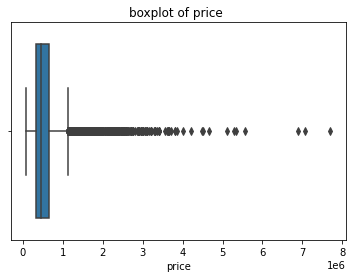

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


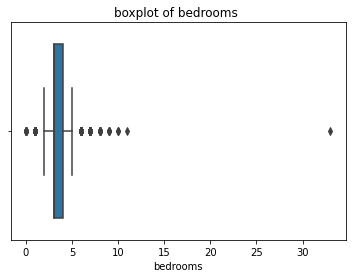

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


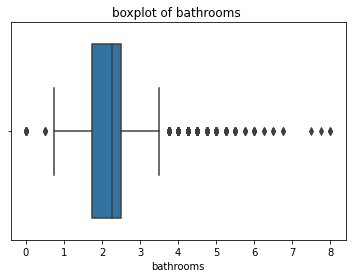

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


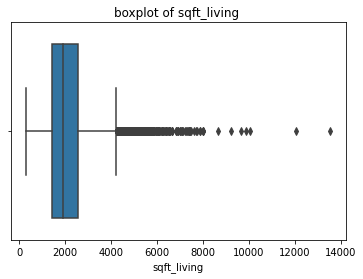

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


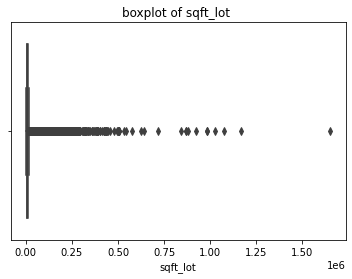

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


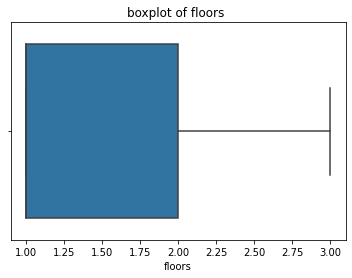

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


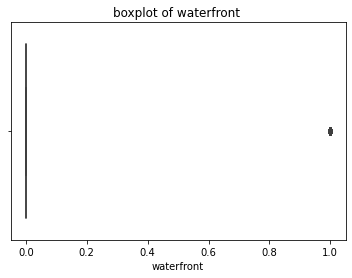

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


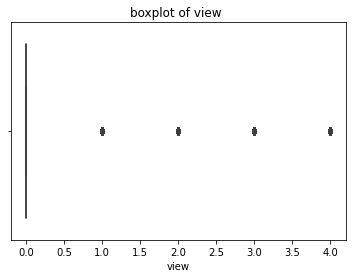

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


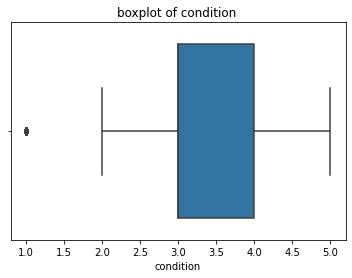

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


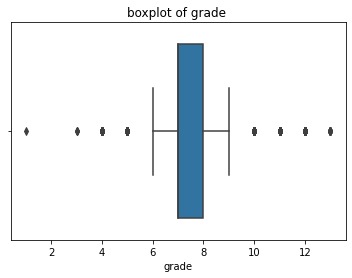

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


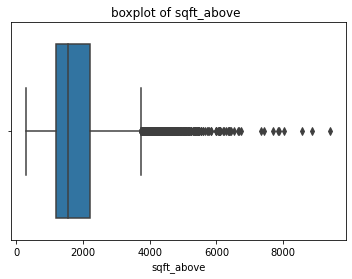

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


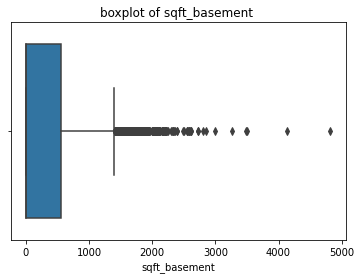

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


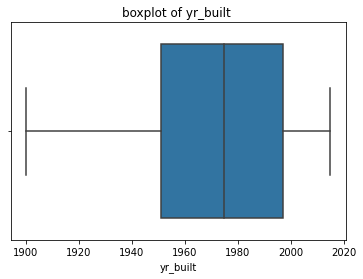

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


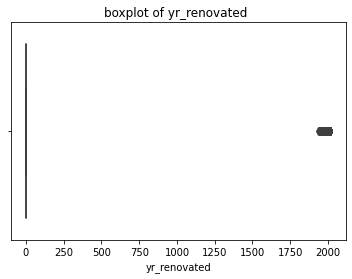

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


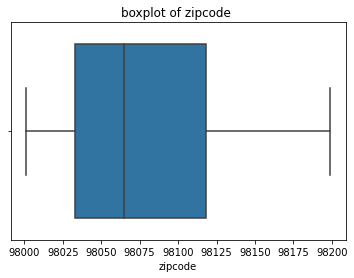

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


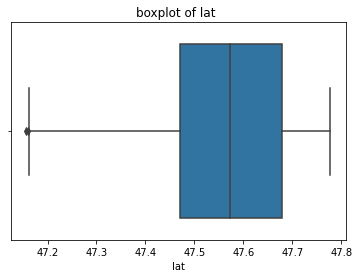

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


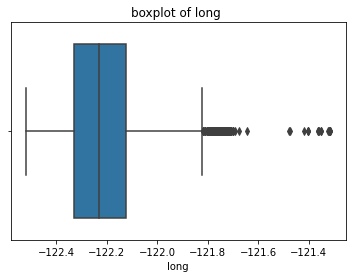

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


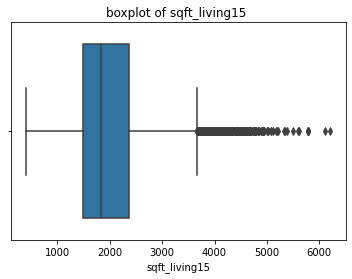

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


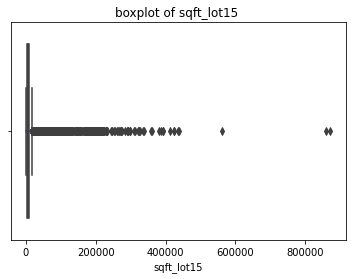

In [9]:
lst=list(houses.columns)
for name in lst:
  plt.title(f'boxplot of {name} ')
  sns.boxplot(houses[name])
  plt.show()


In [10]:
def outs(x):
  global houses,a

  p1,p3=np.percentile(a[x],[25,75])
  iqr=p3-p1
  l_bound=p1-(1.5*iqr)
  u_bound=p3+(1.5*iqr)
  a=a[~((a[x]<l_bound)|(a[x]>u_bound))]

In [11]:
a=houses.copy()
for name in lst:
  outs(name)
a.shape

(13859, 19)

In [12]:
houses.shape

(21610, 19)

> too many outliers ( 13857 ) to be dropped from the dataset ( 21613 )

### External datasource validation

## EDA

> The descriptions for the dataset are located in https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Univarriate

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


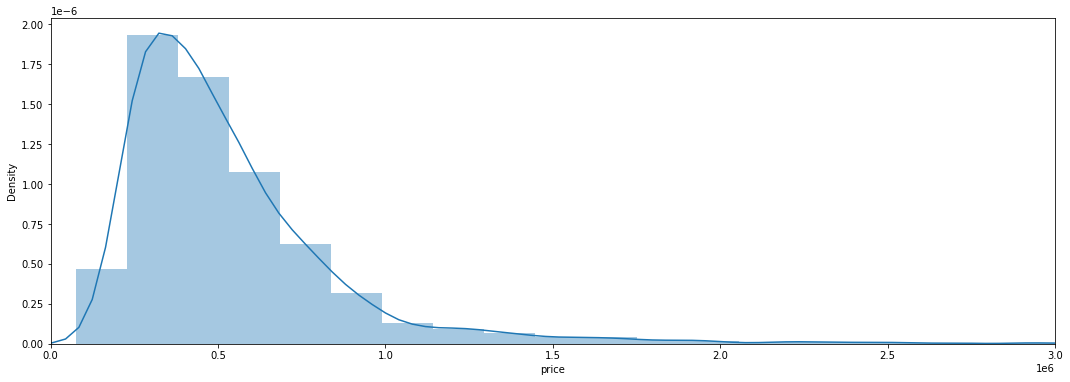

In [ ]:
plt.subplots(figsize=(18,6))
plt.xlim(0,3000000)
sns.distplot(houses.price, )

> most house prices range between 250,000 and 600,000

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


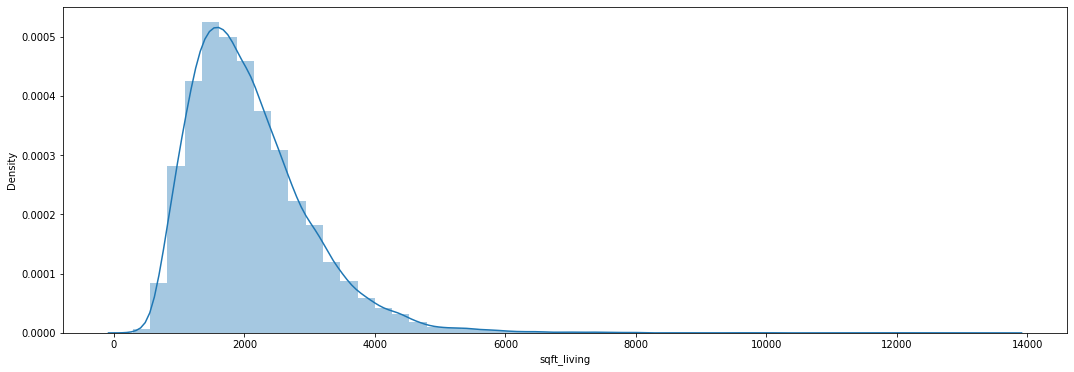

In [ ]:
plt.subplots(figsize=(18,6))
sns.distplot(houses.sqft_living, )

> most living spaces range between 1000 square feet and 3000 square feet

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


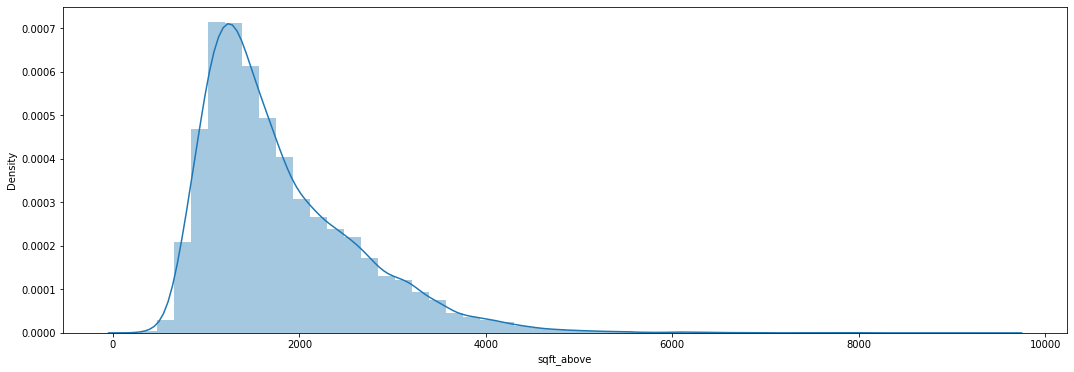

In [ ]:
plt.subplots(figsize=(18,6))
sns.distplot(houses.sqft_above)

> most living spaces above ground range between 1000 and 3000 square feet

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


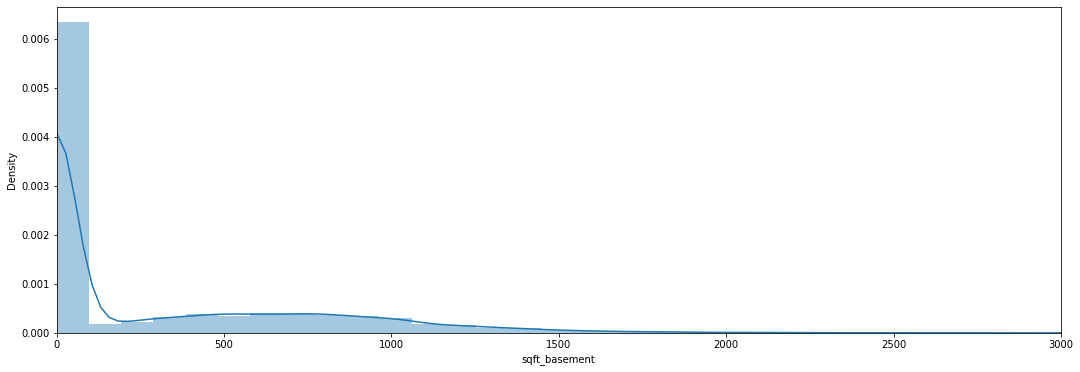

In [ ]:
plt.subplots(figsize=(18,6))
plt.xlim(0,3000)
sns.distplot(houses.sqft_basement)

> most homes have no basement or a basement less than 200 square feet

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


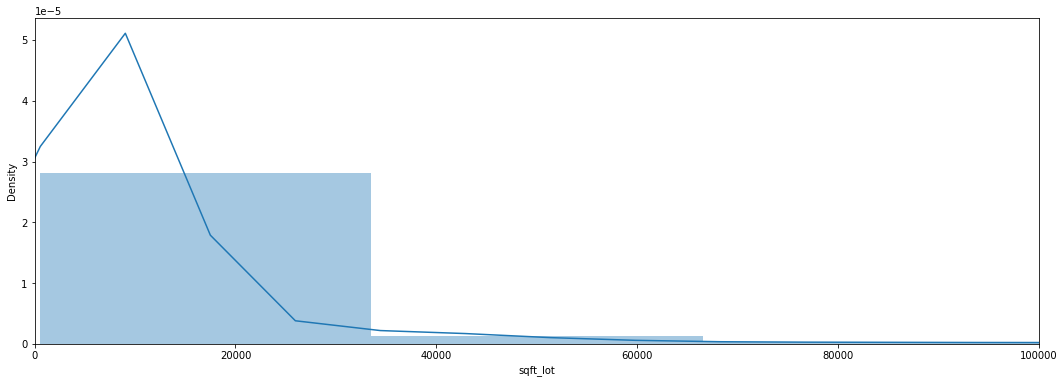

In [ ]:
plt.subplots(figsize=(18,6))
plt.xlim(0,100000)
sns.distplot(houses.sqft_lot)

> most plot sizes range between 0 and 30000 square feet

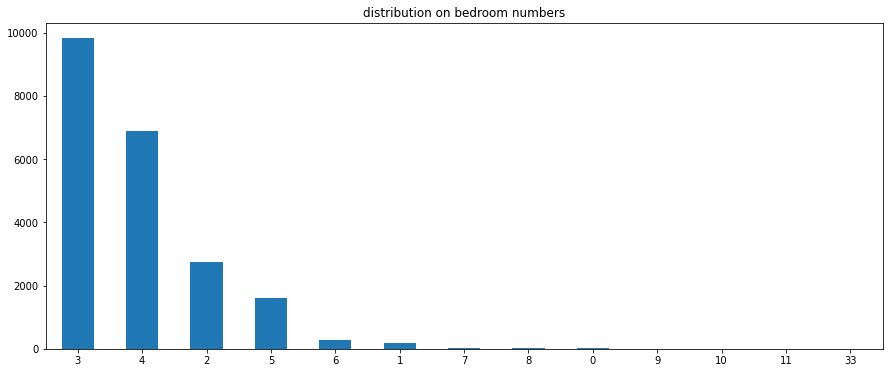

In [ ]:
(houses.bedrooms.value_counts()).plot(kind='bar',rot=0,title='distribution on bedroom numbers',figsize=(15,6))

> most houses have 3 and 4 bedrooms

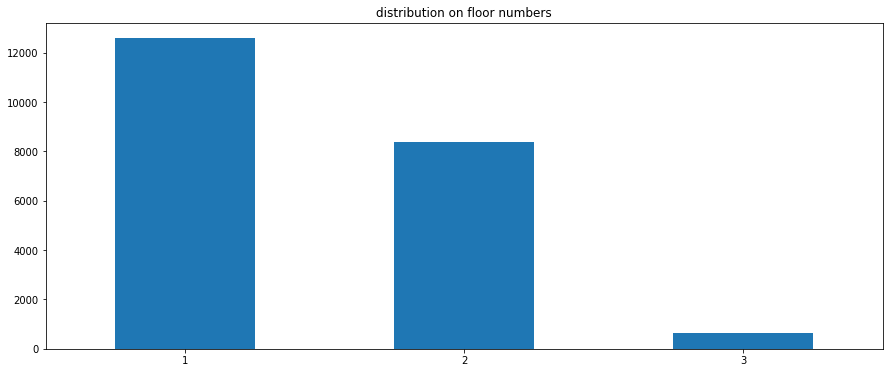

In [ ]:
(houses.floors.value_counts()).plot(kind='bar',rot=0,title='distribution on floor numbers',figsize=(15,6))

> Most houses only have one floor with houses having 3 floors being the least

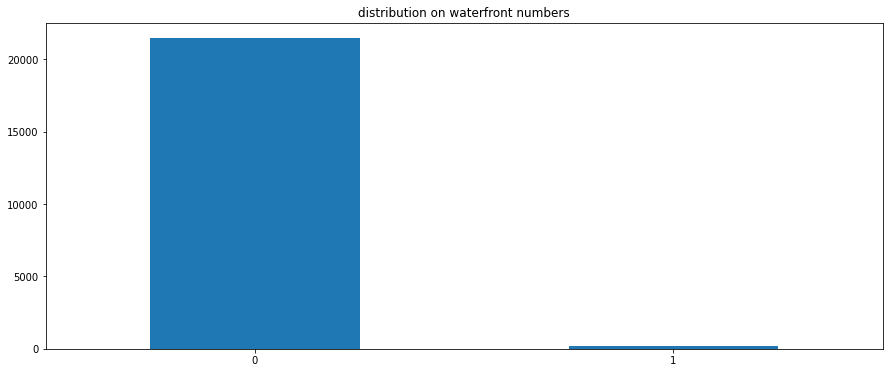

In [ ]:
(houses.waterfront.value_counts()).plot(kind='bar',rot=0,title='distribution on waterfront numbers',figsize=(15,6))

> Most of the houses do not overlook a waterfront

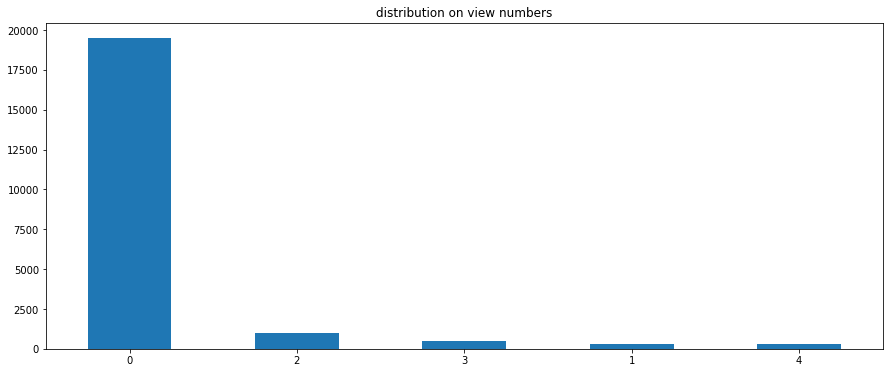

In [ ]:
(houses.view.value_counts()).plot(kind='bar',rot=0,title='distribution on view numbers',figsize=(15,6))

> Most houses have poor views

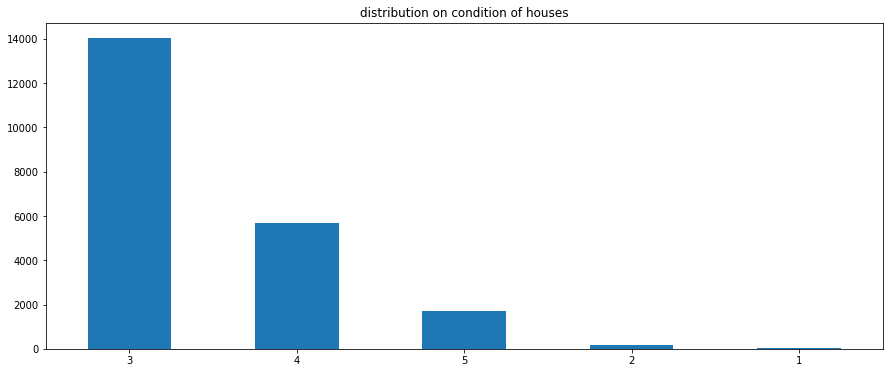

In [ ]:
(houses.condition.value_counts()).plot(kind='bar',rot=0,title='distribution on condition of houses',figsize=(15,6))

> The condition of most houses is average(3)

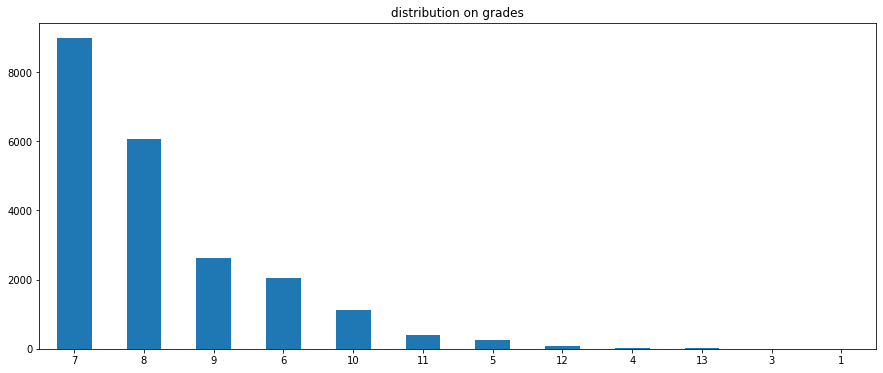

In [ ]:
(houses.grade.value_counts()).plot(kind='bar',rot=0,title='distribution on grades',figsize=(15,6))

> Most Houses have the average grade

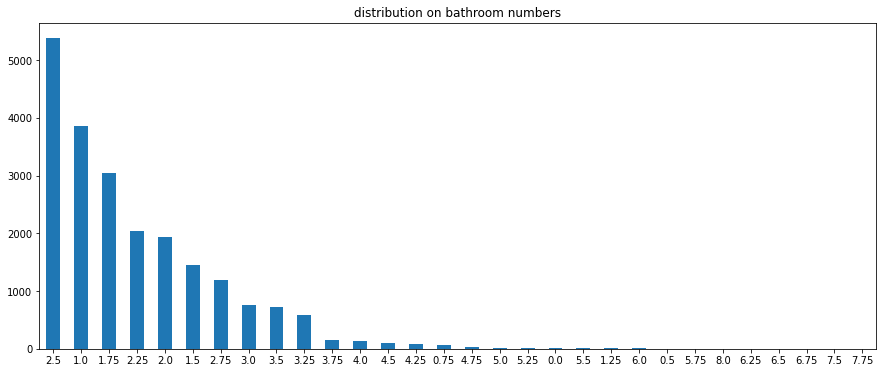

In [ ]:
(houses.bathrooms.value_counts()).plot(kind='bar',rot=0,title='distribution on bathroom numbers',figsize=(15,6))

> Most houses have 2 and a half bathrooms

A full bathroom has either a sink and toilet and tub OR a sink and toilet and shower. ( It could also have sink and toilet and tub and shower. )

A half bathroom has only a sink and toilet . Sometimes this is also called a “ Powder Room

### Bivarriate

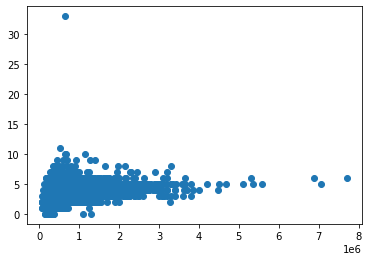

In [ ]:
plt.scatter(houses.price,houses.bedrooms)

> The dustribution of bedrooms and house price implies that number of bedrooms doesnt have much of an impact on the price of the house

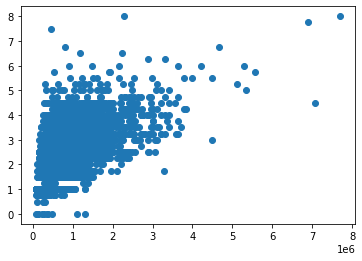

In [ ]:
plt.scatter(houses.price,houses.bathrooms)

> The price of houses increases with the increase in number of bathrooms

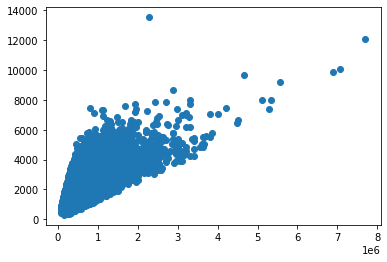

In [ ]:
plt.scatter(houses.price,houses.sqft_living)

> The price of houses goes up as living space increases

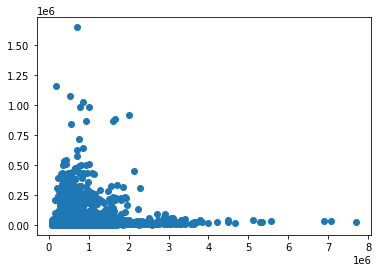

In [ ]:
plt.scatter(houses.price,houses.sqft_lot)

>  the distribution implies The land space has little impact on price of the house, as can be seen where there are different land sizes at the same price

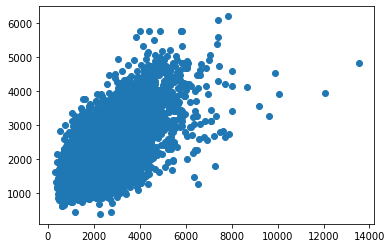

In [ ]:

plt.scatter(houses.sqft_living,houses.sqft_living15)

> This implies houses in the  same neighbourhood generally have similar living spaces, since living space and neighbour living space is directly proportional

- Correlations

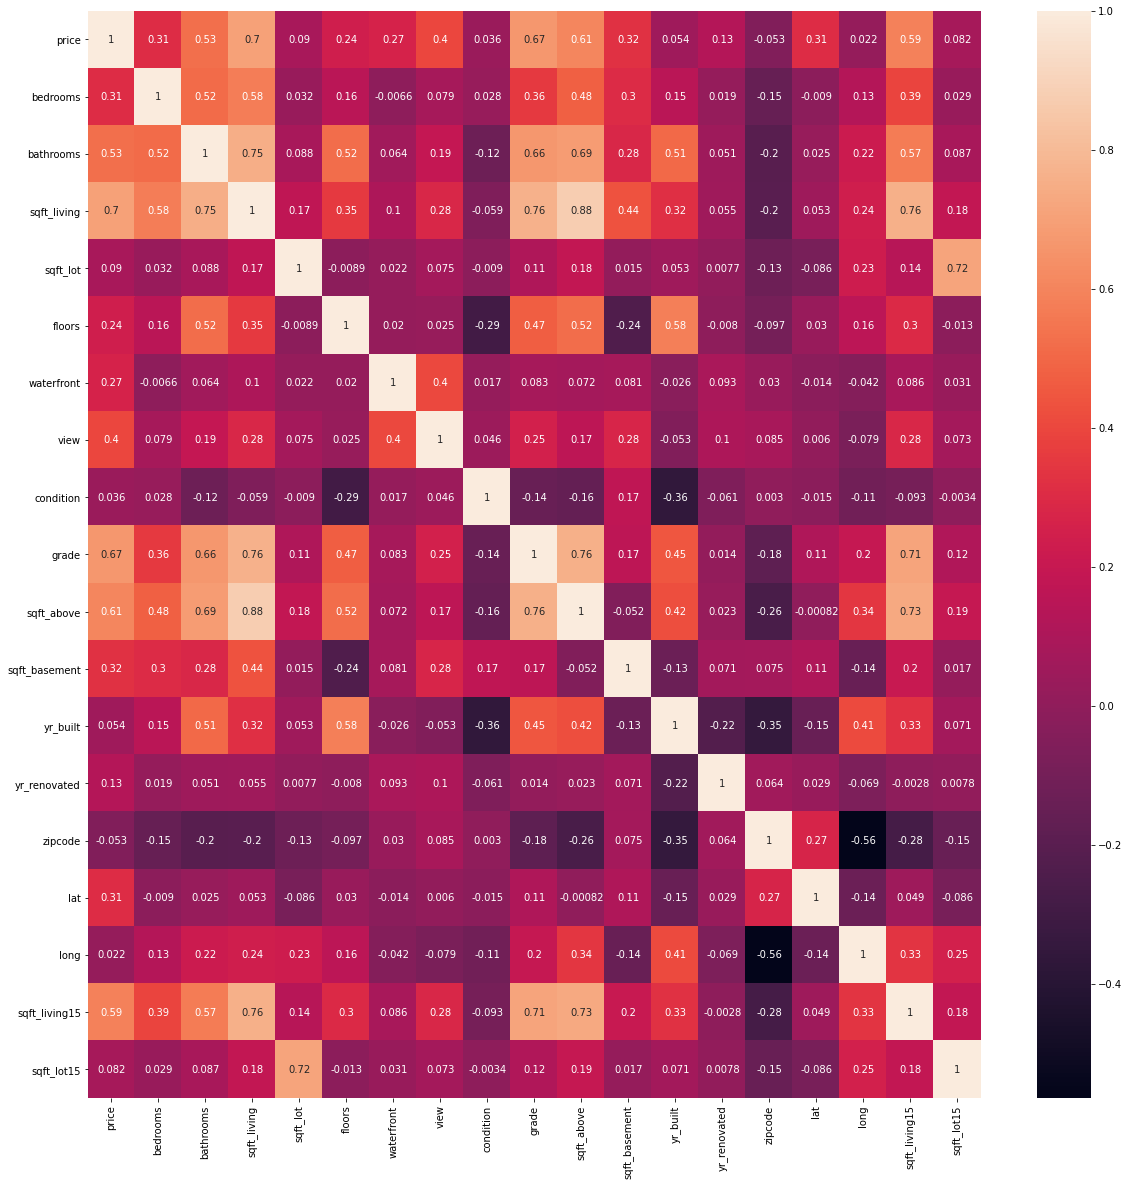

In [ ]:
heat=houses.copy()
plt.subplots(figsize=(20,20))
sns.heatmap(heat.corr(),annot=True)

- Amount of living space above ground has a high correlation to the total amount of living space since most houses dont have basements.
  - It is also highly related to the grade of the house which in most cases is subject to during grading of houses.
- Living space of the house has a high correlation with the living space of the houses in the neighbourhood since the distribution above shows they are directly proportional hence houses in the neighbourhood will have similar living spaces

## Implementing the solution

## regressions

In [13]:
pd.options.display.float_format='{:.6f}'.format

In [14]:
x=houses.drop('price',axis=1)
y=houses['price']

### Linear

- importig the libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold 
import scipy as sp #For homogenuity

- Checking the weight of the columns to price

In [ ]:
regressor=LinearRegression()
regressor.fit(x,y)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-35730.389355
bathrooms,41678.985528
sqft_living,110.329588
sqft_lot,0.127515
floors,4436.471826
waterfront,582697.247728
view,53067.551226
condition,26361.707020
grade,96131.325296
sqft_above,71.492052


In [ ]:
x_=x[['lat','long','waterfront','grade','view','bathrooms','condition']]
y_=np.log10(y)

> I picked the attributes that have the highest impact on the prediction of prices ( the absolute value of the coeffecient of the attribute)

> I converted the values of the prices to log of base 10 to counter the fact that the values kept predicting negative values.

In [29]:
def unlog(x):
  return 10**x

> Changing the values of the values to and from base 10
- based on 
** logb (y)= x
** y = b ^ x


* checking for multicolinearity

In [ ]:
correlations = x_.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,lat,long,waterfront,grade,view,bathrooms,condition
lat,1.045718,0.173039,0.019395,-0.207793,0.038714,0.066642,0.010257
long,0.173039,1.111741,0.011505,-0.156971,0.149446,-0.167873,0.070283
waterfront,0.019395,0.011505,1.193710,0.019617,-0.484241,-0.000371,0.006625
grade,-0.207793,-0.156971,0.019617,1.920912,-0.287950,-1.168810,0.124879
view,0.038714,0.149446,-0.484241,-0.287950,1.294793,-0.065790,-0.084660
bathrooms,0.066642,-0.167873,-0.000371,-1.168810,-0.065790,1.831165,0.045850
condition,0.010257,0.070283,0.006625,0.124879,-0.084660,0.045850,1.035203


> they are all around 1 so they are not that multicolinear and can be used

- Creating test and train splits and the model

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x_,y_,test_size=0.2,random_state=543)
linear=LinearRegression()
linear.fit(x_train,y_train)

coeff_df = pd.DataFrame(unlog(linear.coef_), x_.columns, columns=['Coefficient'])
coeff_df

,Coefficient
lat,4.366000
long,0.953651
waterfront,1.500108
grade,1.261022
view,1.103794
bathrooms,1.135397
condition,1.116944


- Checking the R2 score and The comparison of the predicted prices and actual prices

In [ ]:
y_pred=linear.predict(x_test)
y_pred_=unlog(y_pred)
y_test_=unlog(y_test)
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print('R2 score',metrics.r2_score(y_test, y_pred)*100,'%')
print('log10 dataframe',comp.describe())

comp_=pd.DataFrame({'Actual':y_test_,'Predicted':y_pred_})
print('R2 score',metrics.r2_score(y_test_, y_pred_)*100,'%')
comp_.describe()

R2 score 69.96440814181585 %
log10 dataframe            Actual   Predicted
count 4322.000000 4322.000000
mean     5.666445    5.665600
std      0.229669    0.193737
min      4.913814    4.726792
25%      5.509370    5.534131
50%      5.653213    5.660029
75%      5.806180    5.777266
max      6.653213    6.729730
R2 score 68.06351782029788 %


,Actual,Predicted
count,4322.000000,4322.000000
mean,541148.981953,517153.797697
std,372091.638669,303145.288450
min,82000.000000,53307.924494
25%,323125.000000,342082.843726
50%,450000.000000,457118.705111
75%,640000.000000,598777.598471
max,4500000.000000,5366977.851901


> An R2 score of 68% is acceptable furthermore the means are simmilar ,the standard deviation also seems close

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_, y_pred_))
lin=metrics.mean_squared_error(y_test_, y_pred_)
print('Mean Squared Error:', lin)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_, y_pred_)))

Mean Absolute Error: 125153.92345878284
Mean Squared Error: 44206527585.525375
Root Mean Squared Error: 210253.4841222028


In [ ]:
x_=x[['lat','long','waterfront','grade','view','bathrooms','condition']].values
y_=(np.log10(y)).values

folds = KFold(n_splits=10)

rmses = []
count = 1
for train, test in folds.split(x_):
  x_train, x_test = x_[train], x_[test]
  y_train, y_test = y_[train], y_[test]

  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)

  y_pred = regressor.predict(x_test)
  y_pred_=unlog(y_pred)
  y_test_=unlog(y_test)

  rmse =  np.sqrt(metrics.mean_squared_error(y_test_, y_pred_))
  rmses.append(rmse)
  
  print('Model',count,' Root Mean Squared Error:',rmse)
  count = count + 1
print('average rmse',np.mean(rmses))

Model 1  Root Mean Squared Error: 198028.9086415345
Model 2  Root Mean Squared Error: 236957.67537770447
Model 3  Root Mean Squared Error: 204121.60432773927
Model 4  Root Mean Squared Error: 209837.68109102486
Model 5  Root Mean Squared Error: 183918.92833028265
Model 6  Root Mean Squared Error: 210359.12485952026
Model 7  Root Mean Squared Error: 206640.11365981583
Model 8  Root Mean Squared Error: 202761.98769002385
Model 9  Root Mean Squared Error: 202134.7556556162
Model 10  Root Mean Squared Error: 212170.88742933967
average rmse 206693.16670626015


> Cross validation using Kfold shows the models rmse is above the average rmse of 10 folds although the value is not explicitely larger than all rmse values present in the kfold implying it is not wrong

In [ ]:
residuals = np.subtract(y_pred_, y_test_)
pd.DataFrame(residuals).describe()

,0
count,2161.000000
mean,-10923.866134
std,211938.529628
min,-1894663.374272
25%,-73245.918020
50%,9728.711325
75%,89563.091432
max,1905122.649839


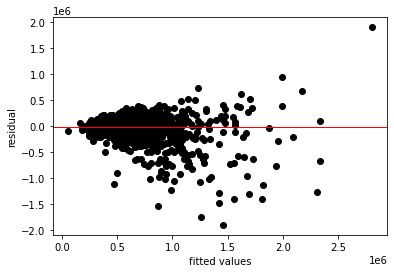

In [ ]:
plt.scatter(y_pred_, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

> the residuals are centered around 0 and shows an eliptic patern

- Checking our heteroskedasticity 

In [ ]:

test_result, p_value = sp.stats.bartlett(y_pred_, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
crit = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(crit,test_result)
if (test_result > crit):
  print('Unequal variances, the model should be reassessed')
else:
  print('Constant variance , accept null hypothesis')

### quantile

- importing the libraries for the quantile plot

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


m1

In [ ]:
x__=x[['lat','long','waterfront','grade','view','bathrooms','condition']]

In [ ]:
quantiles = [0.25,0.5,0.75]
models = []
params = []

for qt in quantiles:
	mod = smf.quantreg(f"y ~ x__", houses)
	res = mod.fit(q = qt )
	models.append(res);
	print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3619
Model:                       QuantReg   Bandwidth:                   2.025e+04
Method:                 Least Squares   Sparsity:                    2.971e+05
Date:                Sun, 22 Nov 2020   No. Observations:                21610
Time:                        10:16:17   Df Residuals:                    21602
                                        Df Model:                            7
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.539e+07   8.21e+05    -18.749      0.000    -1.7e+07   -1.38e+07
x__[0]      4.845e+05   7374.989     65.696      0.000     4.7e+05    4.99e+05
x__[1]      6.722e+04   6785.992      9.905      0.000    5.39e+04    8.05e+04
x__[2]      2.598e+05   1.11e+04     23.451      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3969
Model:                       QuantReg   Bandwidth:                   2.260e+04
Method:                 Least Squares   Sparsity:                    3.058e+05
Date:                Sun, 22 Nov 2020   No. Observations:                21610
Time:                        10:16:19   Df Residuals:                    21602
                                        Df Model:                            7
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.042e+07   9.64e+05    -31.560      0.000   -3.23e+07   -2.85e+07
x__[0]      6.115e+05   7676.217     79.658      0.000    5.96e+05    6.27e+05
x__[1]     -5464.0762   7787.771     -0.702      0.483   -2.07e+04    9800.530
x__[2]      5.057e+05   1.31e+04     38.499      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


> the coefecients of the quantile model and the linear model are different

- The intercept in the the:
    * 25 th precentile : -1687.71843
    * 50 th precentile : -3335.95806
    * 75 th precentile : -5423.94760

> The attributes do not have the same scale so plotting them would be ineffecient

used:
 -  when you have data that the shape of the conditional distributions changes and therefore a model that is more flexible(quantile regression) is needed

### Ridge

- importing the liblaties

In [16]:
from sklearn.linear_model import Ridge
!pip install pydataset
from pydataset import data 

     |████████████████████████████████| 15.9MB 1.7MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp36-none-any.whl size=15939431 sha256=496b27761fec0e46e93675aef2b4e59f8bd5285b0f9cedd4fa67cf29612e239f
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


- creating the dataframes

In [30]:
x_ =x[['lat','long','waterfront','grade','view','bathrooms','condition']]
y_=houses['price']
y=np.log10(y_)

In [21]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)},  scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

- creating test and train sets and getting the alpha

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.25, random_state=101)
search.fit(x_train,y_train)
search.best_params_

{'alpha': 0.0001}

In [23]:
{'alpha': 0.001}
abs(search.best_score_)

53415586723.80586

- creating the model

In [32]:
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)

y_pred=unlog(y_pred)
y_test=unlog(y_test)
ridg =(metrics.mean_squared_error(y_test,y_pred))
ridg

46224021456.22915

- getting the coeficients of the ridge regression

In [34]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,x_.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.05447539052185979,
 'condition': 0.04727413036963982,
 'grade': 0.09985879864186044,
 'lat': 0.6386966914003586,
 'long': -0.018183264030386424,
 'view': 0.04435549872466886,
 'waterfront': 0.16447013107835637}

In [35]:
comp_=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print('R2 score',metrics.r2_score(y_test, y_pred)*100,'%')
comp_.describe()

R2 score 66.00975191278766 %


,Actual,Predicted
count,5403.000000,5403.000000
mean,545308.105127,519853.540710
std,368805.075920,293348.331951
min,82000.000000,88985.961268
25%,324000.000000,345388.411595
50%,455000.000000,457796.372370
75%,650000.000000,608052.465989
max,5570000.000000,5219066.526038


### lasso

- importing libraries

In [20]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

- Creating the datasets

In [ ]:
x_ =x[['lat','long','waterfront','grade','view','bathrooms','condition']]
y=houses['price']

- Scaling the attributes dataset

In [ ]:
scaler = StandardScaler()
scaler.fit(x_)
x_ = scaler.transform(x_)

- Creating the test and train sets, and creating the Lasso regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train)
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
lass=metrics.mean_squared_error(unlog(y_test), unlog(gridlasso.predict(x_test)))
print("lasso MSE:", lass)
print("linear MSE:", metrics.mean_squared_error(y_test, linear.predict(x_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6117233611296362
linear score: 0.6117312598896085
lasso MSE: 52802520417.167625
linear MSE: 52801446248.92529
lasso best estimator coef: [ 89904.91957836 -17465.72691633  48590.69145738 181206.73927655
  64141.57626584  62836.73038358  42802.99193127]
linear coef: [ 89925.43079613 -17489.49597017  48606.90974965 181216.718884
  64147.62100561  62860.11555348  42828.83657319]


- Checking whether attributes were shrunk to 0

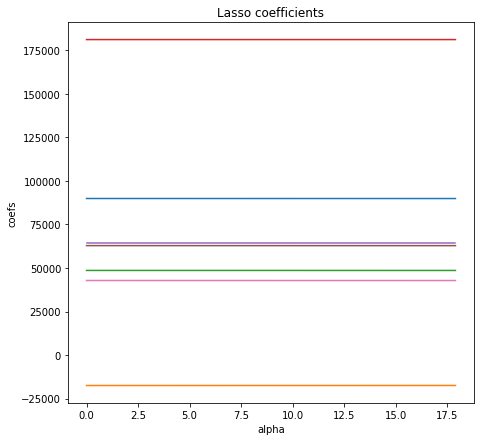

In [ ]:
coefsLasso = [] 
alphasLasso = np.arange (0, 18, 0.1) 

for i in range(180):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    coefsLasso.append(lasso.coef_) 

plt.figure(figsize = (16,7))
plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

> as it turns out all the culumns being used are rather important so none was shrunk to zero

### Elastic net

- importing the libraries

In [36]:
from sklearn.linear_model import ElasticNet

- creating the datasets

In [41]:
x_ =x[['lat','long','waterfront','grade','view','bathrooms','condition']]
y=houses['price']

- Setting parameters

In [42]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

- Creating the train and test datasets and getting the parameters

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.25, random_state=101)
search.fit(x_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

- Setting the parameters and making the model

In [44]:
abs(search.best_score_)
elastic=ElasticNet(normalize=True,alpha=0.00674,l1_ratio=0.8)
elastic.fit(x_train,y_train)
y_pred=elastic.predict(x_test)
elast=(metrics.mean_squared_error(y_test,y_pred))
print(elast)

124697973165.04813


- Getting the coefecients of the columns

In [45]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,x_.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 10410.179084594876,
 'condition': 938.2974388194829,
 'grade': 8810.141516010575,
 'lat': 35203.82993115946,
 'long': 1572.031610115749,
 'view': 7993.905381787889,
 'waterfront': 45317.268829945366}

In [46]:
comp_=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print('R2 score',metrics.r2_score(y_test, y_pred)*100,'%')
comp_.describe()

R2 score 8.304926522541823 %


,Actual,Predicted
count,5403.000000,5403.000000
mean,545308.105127,538612.303402
std,368805.075920,20903.207575
min,82000.000000,480653.292698
25%,324000.000000,524443.059573
50%,455000.000000,535760.948609
75%,650000.000000,549118.619388
max,5570000.000000,693263.619498


## conclusion

### Predictions

Predicting using the same values on the different models.
- Latitude : 47.710
- Longitude: -122.19
- Waterfront: 0
- Grade : 5
- Views : 3
- Bathrooms : 2
- Condition : 6

In [48]:
prd=[47.710,-122.19,0,5,3,2,6]

In [ ]:
'Linear model price prediction',linear.predict([prd])

('Linear model price prediction', array([8448079.19658163]))

In [51]:
'Ridge model price prediction',unlog(ridge.predict([prd]))

('Ridge model price prediction', array([542221.66090859]))

In [ ]:
'Lasso model price prediction',lasso.predict([prd])

('Lasso model price prediction', array([8444970.51916429]))

In [50]:
'Elastic model price prediction',elastic.predict([prd])

('Elastic model price prediction', array([543418.69252362]))

> - The lasso and linear models predicted pretty similar values
  - The Elastic model predicted the lowest price 

### best model

In [ ]:
k={'ridge ':ridg,'lasso ':lass,'elast ':elast}
small=min(k,key=k.get)
print(small,k[small])

lasso  52802520417.167625


In [ ]:
k={'ridge ':ridg,'lasso ':lass,'elast ':elast,'linear':lin}
small=min(k,key=k.get)
print(small,k[small])

('linear', 44206527585.525375)

> of the three models that deal with multicolinearity the lasso regression had the lowest mse therefore it was best of the three on this dataset

> However the linear model had a lower overall mse hence would be the prefered model, this could be beause the attributes used in the models were rather important to the prices of the houses and were not multicollinear and therefore the normal least squares proved to be more effective.

> The elastic and linear models are similar in some ways since they both predicted values that were really close and were the models with the lowest mse's

#### Challenging the solution

> In this case the attributes used in the models were not that colinear and were important to the prediction of the house prices, and therrefore the linear model proved to be better. However it is not confirmed that this would be the case had we used different attributes and this warants further study